Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from fancyimpute import IterativeImputer, KNN


Load dataset:

In [ ]:

# Load the dataset
merged_data = pd.read_csv("merged_data.csv")

merged_data.head()


,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Feiertag
0,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0,NaN
1,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN,NaN
2,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0,NaN
3,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0,NaN
4,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN,NaN


Visualization of Missing Data:

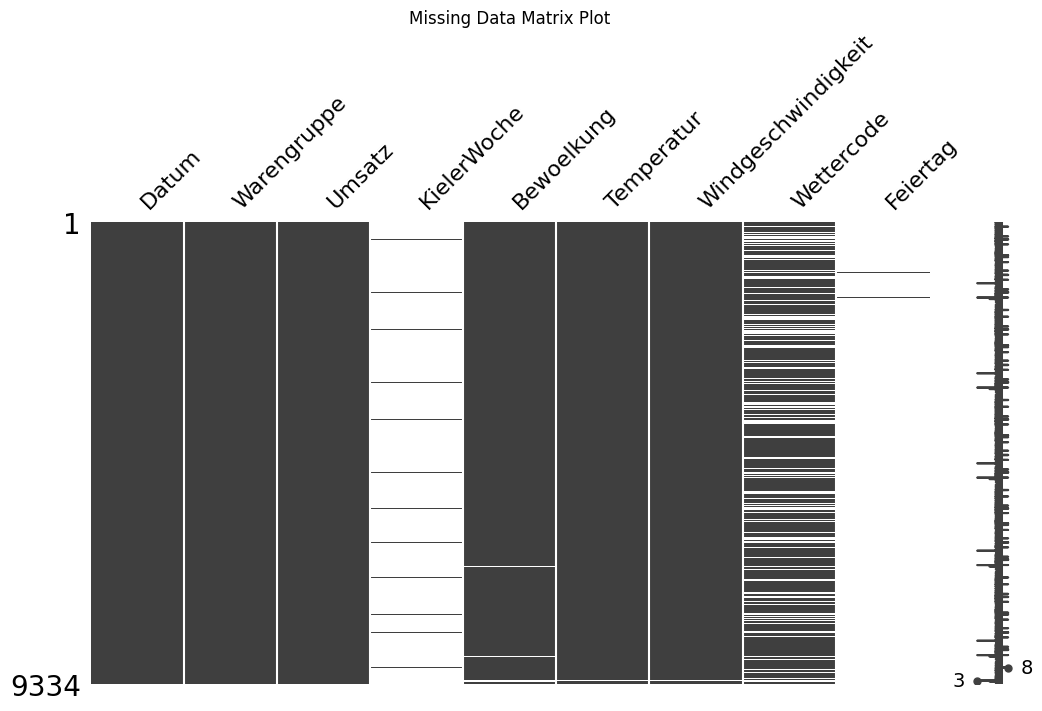

In [8]:
# Matrix plot of missing data
msno.matrix(merged_data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

Datum auf Wochentage mappen, 
Reihenfolge festlegen, 
Durchschnitt vom Umsatz pro Wochentag berechnen
Werte begutachten

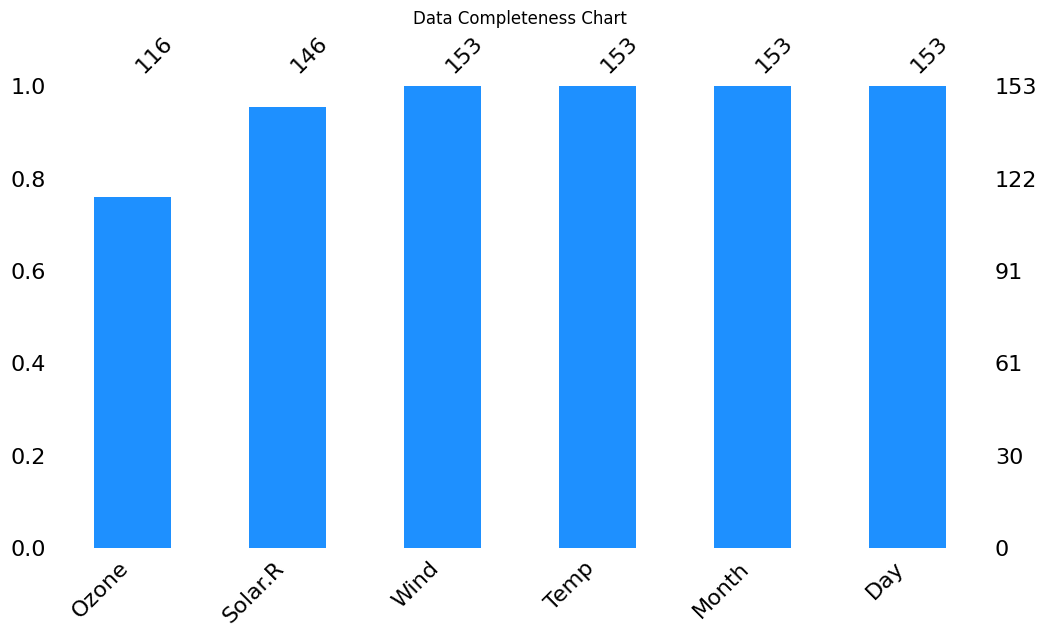

In [8]:
# Bar plot of complete data
msno.bar(airquality, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

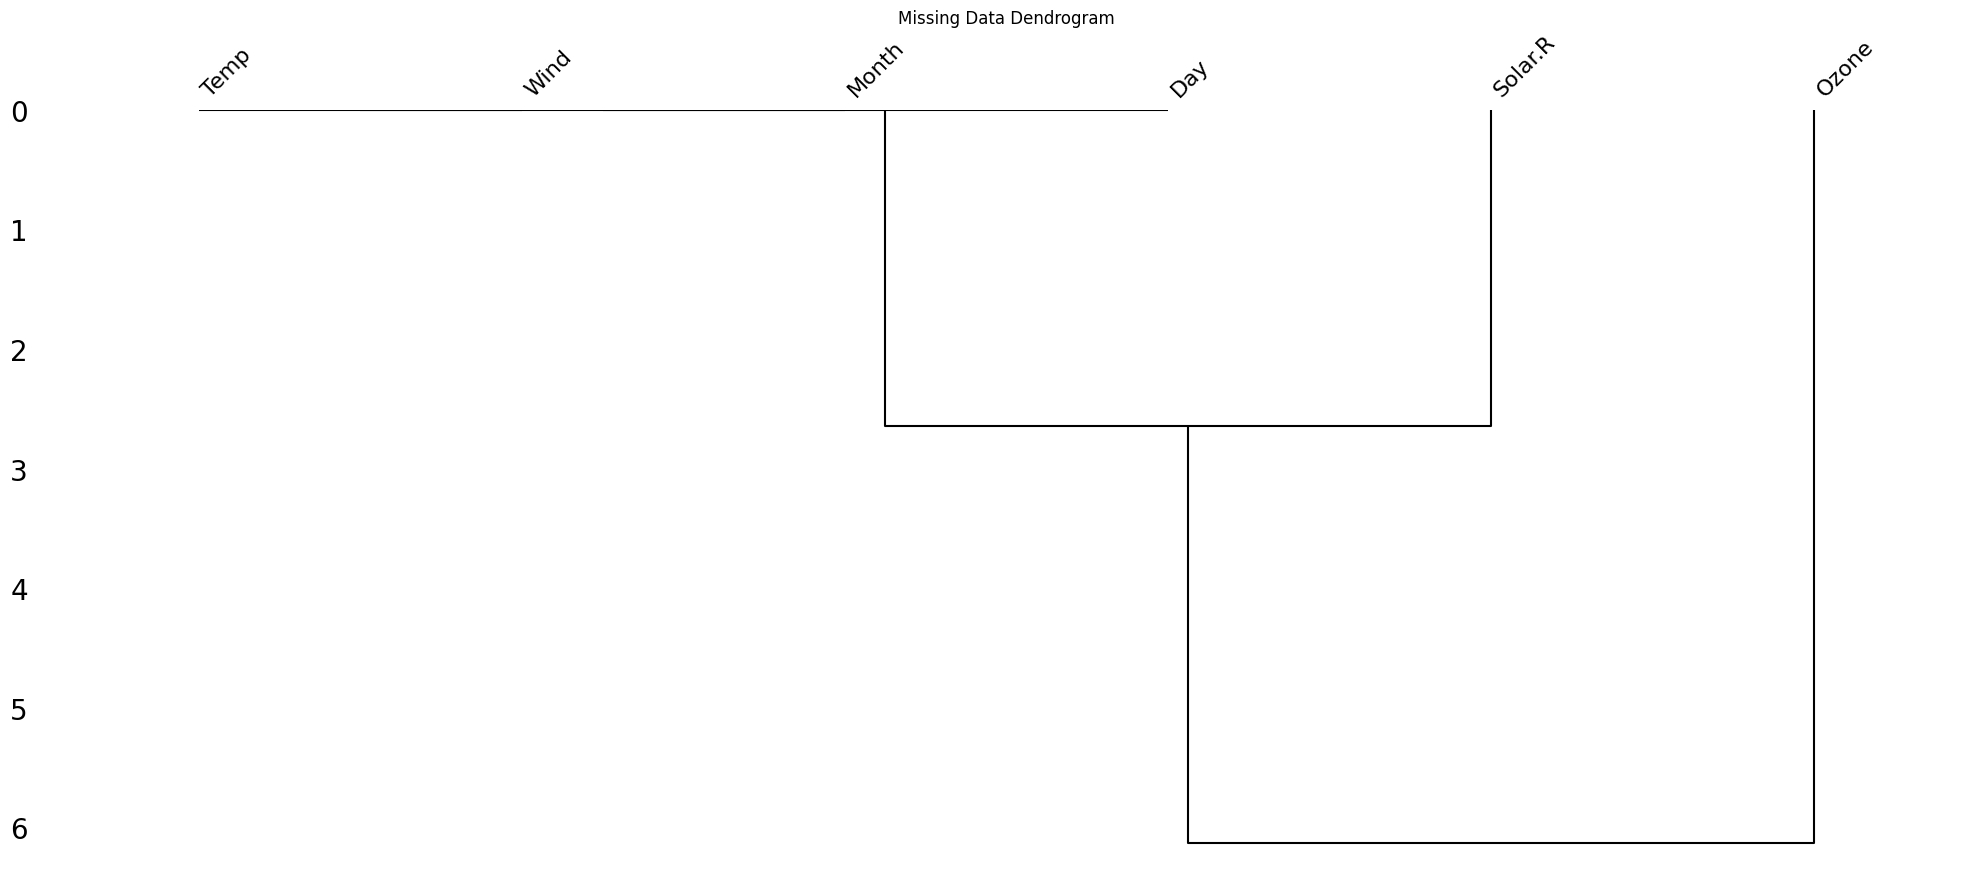

In [9]:
# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(airquality)
plt.title('Missing Data Dendrogram')
plt.show()


In [10]:
# Create a mask for the imputed values
mask = airquality['Ozone'].isna()  # mask for missing values in 'Ozone'

In [11]:
# KNN imputation
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(airquality), columns=airquality.columns)


Imputing row 1/153 with 0 missing, elapsed time: 0.007
Imputing row 101/153 with 0 missing, elapsed time: 0.008


In [12]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(airquality), columns=airquality.columns)

In [13]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


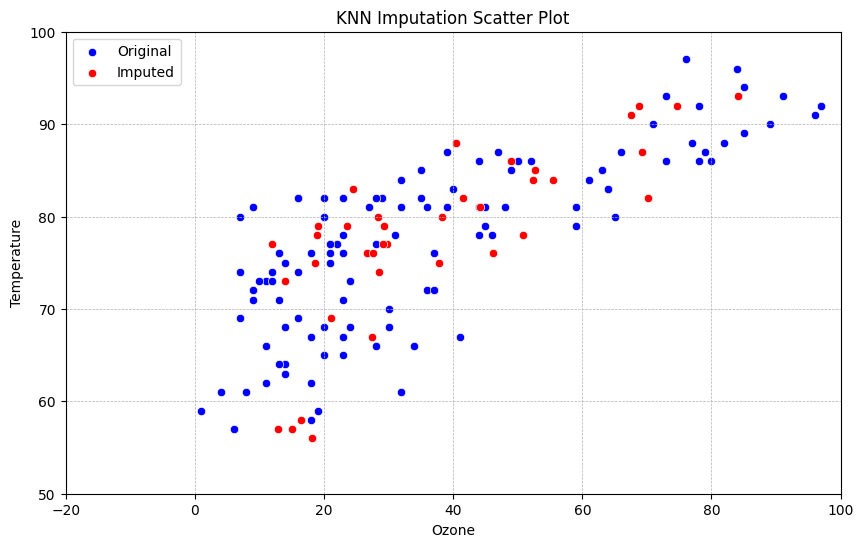

In [14]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(airquality, airquality_knn, 'Ozone', 'Temp', mask, 'KNN Imputation Scatter Plot', 'Ozone', 'Temperature')

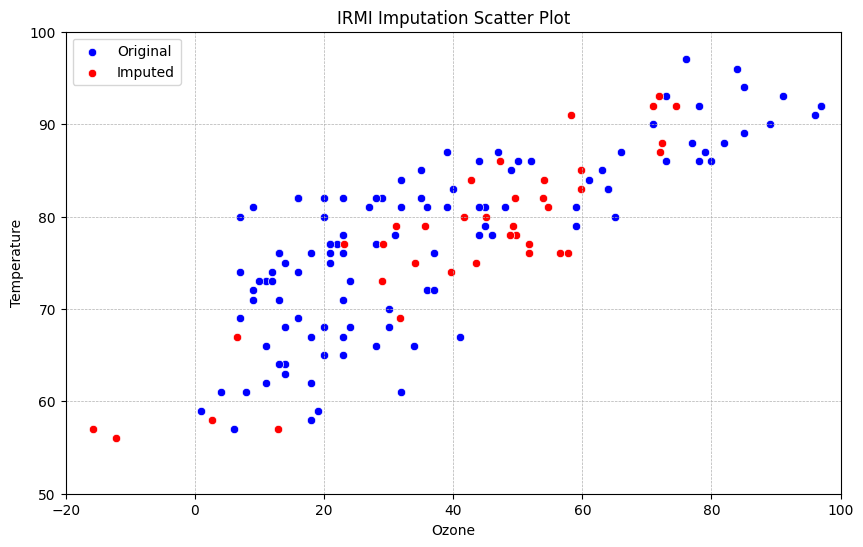

In [15]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality, airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

In [16]:
print("Correlation in original data:", airquality['Ozone'].corr(airquality['Temp'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Ozone'].corr(airquality_knn['Temp']))
print("Correlation after IRMI:", airquality_irmi['Ozone'].corr(airquality_irmi['Temp']))

Correlation in original data: 0.6983603421509318
Correlation after KNN imputation: 0.6938473095886781
Correlation after IRMI: 0.7251146461034882
